# Mandatory assignment GEO2310: Boundary Layer
## _Analysis of turbulent fluxes between surface and atmosphere_

_You may work together on the assignment, but you should all write and hand in individual assigments. Please state with whom you have cooperated with in your hand in._ <br> <br>

_In this assignment you will use data from our eddy-covariance tower in Finse. The data used herein is from summer 2018 (representing a typical summer situation regarding the fluxes) with 10 Hz sampling frequency. During the excursion (April 2024) you will get recent data, such that we can (1) interprete the fluxes in the context of the observed weather and (2) compare the summer situation (assignment) with the one in April (excursion). This also means, that it would be clever to think about the reusability of your code, then you could adapt your code from the assignment to a new data set more quickly :)_  <br> <br>


_Submission deadline of the assignment: 17.04.2024 23:59 pm_

## About the assigment:
In part of this assigment you will be using data from a eddy covariance measurement station which is located at Finse on Hardangervidda. The photo below shows the area around the station and the two measurement instruments needed to measure eddy covariance.

<img src="pic_finse.png" alt="Finse"
	title="Finse" width="300"/>
<img src="pic_instrument.png" alt="Instrument"
	title="Instrument" width="300"/>

**Figure 1:** _Eddy covariance station at Finse in June and January. Gas analyzer and anemometer are placed at 4.4 meters above the surface (without snow cover)._    

Exercise 1 and 2 are introductory theory questions which should be answered in writing in the report (you may choose to write them into the jupyter notebook or in a separate document). 

You may want to spend some time on getting to know pandas for this exercise. Some good places to start may be [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) or say [here](https://www.codecademy.com/learn/data-processing-pandas) (I think this is for free with some advertisement). 



### The dataset:
#### NB: Unzip the prepared_raw_data.zip before proceeding!
For this assignment and out you will work with data from the eddy covariance station at Finse. The raw data contain 10 Hz measurements of 
- horizontal winds (u_m/s and v_m/s) [m/s]
- vertical wind (w_m/s) [m/s]
- temperature (T_degC) [$^\circ$C]
- mixing ratio of H$_2$O [ppt -- parts per thousands]
- mixing ratio of CO$_2$ [ppm -- parts per million]

The files contain data from some days in July 2018 and are split into 30 min intervals. 

You may use the snippet below to load the files into a pandas dataframe. 

In [2]:
import glob
import os
import pandas as pd
path = 'prepared_raw_data/' # path to files
all_files = glob.glob(os.path.join(path, "*.csv")) 
all_files.sort()
df_from_each_file = (pd.read_csv(f,index_col=0,parse_dates=True) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file)#.sort_index()
dataset = concatenated_df.sort_index()
dataset = dataset.asfreq(freq='100L')

If you prefer to work with numpy, the data can be extracted into numpy arrays as follows:

In [3]:
# Example: extract numpy array from dataset:
u=dataset['u_m/s'].values

In [4]:
# Import useful packages
import pandas as pd # import pandas to handle datasets
import numpy as np 
import matplotlib.pyplot as plt

rho_a = 1.07 # Tetthet luft kg/m^3 
c_p = 1010.0 # Spesikk varmekapasitet ved konstant xtrypp for luft J/K kg
Lv = 2.48e6  # Kondensasjonsvarme for vann J/kg
Mh2o=0.01802 # molecular weight of water

Pa=86000.  # [Pa] Surface pressure at Finse
va=279.*8.314/Pa # [m3/mol] Molar volume air. Assume T=279: pV=R*T--> V=R*T/p
e = 8.8*1e-3 *Pa # [m3/mol] Molar volume vapor (approximation). Assumed 8.8*10^-3mol/mol mix ratio
vd=va*Pa/(Pa-e) # Molar volume dry air 


# Example: extract numpy array from dataset:
u=dataset['u_m/s'].values

# Calculate rho_H2O:
dataset['rho_H2O'] = dataset['H2O_ppt']*1e-3*Mh2o/vd # [10^3 mol_H2O/mol_air]*[10^-3]*[kg/mol_H2O]/[m3_air/mol_air]-->[kg_H2O/m3_air]

In [5]:
dataset.head() # Have a look at the dataset

,u_m/s,v_m/s,w_m/s,T_degC,CO2_ppm,H2O_ppt,rho_H2O
2018-07-20 08:30:00.000,-1.45624,-3.14443,0.072588,16.002858,377.083,11.1056,0.007354
2018-07-20 08:30:00.100,-1.47010,-3.09434,0.125351,16.282851,376.830,11.0770,0.007335
2018-07-20 08:30:00.200,-1.57426,-2.92186,-0.031325,16.459401,376.561,11.1458,0.007381
2018-07-20 08:30:00.300,-1.74046,-2.47575,-0.363487,16.422050,376.367,11.2016,0.007418
2018-07-20 08:30:00.400,-1.88219,-2.33633,-0.272361,16.203082,376.372,11.2533,0.007452


### Python tips:

To create a linear regression line between variables X and Y:

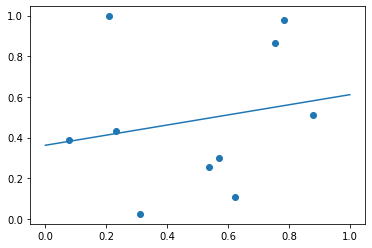

In [6]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
X = np.random.random(10)
Y=np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
plt.scatter(X,Y)
plt.plot(np.linspace(0,1,100), intercept+np.linspace(0,1,100)*slope)

**The datetime package:**
Example:

In [7]:
import datetime
start_time = datetime.datetime(year=2018,month=7, day=20, hour=12)
print(start_time)
dt=datetime.timedelta(minutes=30)
print(start_time+dt)

2018-07-20 12:00:00
2018-07-20 12:30:00


#### Pandas tips:
If you prefer to work with python, you can extract the data to numpy arrays for example by:
```python
u=dataset['u_m/s'].values
```

I suggest, however, that you get to know pandas a litte. It's nice!

Useful functions:

Exchange "DataFrame" below for the name of your dataframe object. 

```python
DataFrame.resample('30min') 
```
Groups your data into 30 min groups. Combine this with some function you would like to apply to these groups, e.g. if you want 30 min avg:
```python
DataFrame.resample('30min').mean()
```

## Exercise 1
Give a short explenation of the processes that contribute to energy fluxes between the atmosphere and the earth surface. Which processes determine the CO$_2$ flux in this ecosystem?

## Exercise 2
Explain the principles for measuring latent and sensible heat flux with the eddy covariance method.
1. Instruments
2. Theory behind the method -- how do we arrive at the equations that we use?
3. Necessary assumptions -- What can you say about the instrument placement and the area around it? (google is allowed)

## Exercise 3
Calculate the mean value and standard deviation for each of the variables for the 30 minuts averaging periods and discuss if the turbulence is stationary in this case. 

In [8]:
import pandas as pd
dt_mean30=dataset.resample('30min')
dt_mean30

## Exercise 4
Choose two periods of 1 hour each that look interesting.
Run a quadrant analysis for each period. That is:

1. Make a scatter plot with T' and w'. Plot also a regression line. Which direction does the flux of sensible heat have? Up or down?
2. Make a scatter plot with $\rho_{H_2O}$' (density of water vapour) and w'. Plot also a regression line. Which direction does the flux of laten heat have? Up or down?
3. Make a scatter plot with CO2_ppm' (density of CO$_
2$) and w'. Plot also a regression line. Which direction does the flux of CO$_2$ have? Up or down?

## Exercise 5:
Calculate the vertical flux of sensible and latent heat (units W/m$^2$ for both!) and the CO$_2$ for each averaging period. The calculation should follow the method (the equations) you described in exercise 2. Make a plot that shows how the fluxes vary with time. 

1. Discuss the results. Which direction does the flux have? Describe the variation throughout the day.
2. Can you say something about how the total energy budget at the surface is in this period?
3. Is the ecosystem a source or a sink of CO$_2$ during the period?
4. What determines/influences the size of the surface area that effects the fluxes ("flux footprint")?

## Exercise 6:
In exercise 3 you calculated the mean vertical wind (w) and you should be able to see that it deviates significantly from zero at times. What could be the cause of this? How will the flux estimates be affected by this? Could you give some other possible sources of errors and uncertainty in the flux estimates at Finse?

## Exercise 7:
Estimate the turbulent kinetic energy (TKE) in the same periods as used above (30 min). Is there any connection between TKE and the fluxes of latent and sensible heat? 

## Exercise 8:
The file 'biomet_data.csv' contains radiation data and soil heat flux for the same period (and a little more). 
The relevant fields are
- SWIN_6_10_1_1_1: shortwave incoming radiation [W/m$^2$]
- SWOUT_6_11_1_1_1: shortwave outgoing radiation [W/m$^2$]
- LWIN_6_14_1_1_1: longwave incoming radiation [W/m$^2$]
- LWOUT_6_15_1_1_1: longwave outgoing radiation [W/m$^2$]
- SHF_6_37_1_1_1: soil heat flux 1 [W/m$^2$]
- SHF_6_37_2_1_1: soil heat flux 2 [W/m$^2$] (you can use one of the soil heat fluxes or their mean)

Use this to discuss the surface energy balance closure. <br>

As hint: The surface energy balance is given by $R_{net} - G = FH + FL$, where $R_{net}$ represents the net radiation. To discuss the closure it is of particular interest to plot $R_{net} - G$ versus $FH + FL$ in a scatter plot (and with linear regression), as well as to look at the residual, i.e., residual = $R_{net} - G - FH - FL$. What does it mean if the residual is not zero (i.e., we say the surface energy balance is not closed)? What could be reasons for this?
